In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [7]:
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=1.0,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
        self.m = m
        

        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.v*self.dt 
        #self.v += self.a*self.dt
        self.v = self.v + self.a*self.dt
        
    def SetPosition(self, i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self, i):
        self.V[i] = self.v
        
    def GetVelocity(self,scale=1):
        return self.V[::scale]
        
    def CheckLimits(self,Limits):
        
        if self.r[0] + self.radius > Limits[0][1]:
            self.v[0] = -self.v[0]
        

In [12]:
def RunSimulation(t):
    
    r0 = np.array([0.1,0.1])
    v0 = np.array([40.,0])
    a0 = np.array([0.,0])
    
    Limits = np.array([[-10.,10.],[-10.,10.]])
    
    p1 = Particle(r0,v0,a0,t)
    
    for it in tqdm(range(len(t))):
        p1.Evolution(it)
        p1.CheckLimits(Limits)
        
    return p1

In [13]:
dt = 0.01
tmax = 10
t = np.arange(0,tmax,dt)
Particles = RunSimulation(t)

100%|████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 26005.70it/s]


In [14]:
scale = 2
t = t[::scale]

<IPython.core.display.Javascript object>


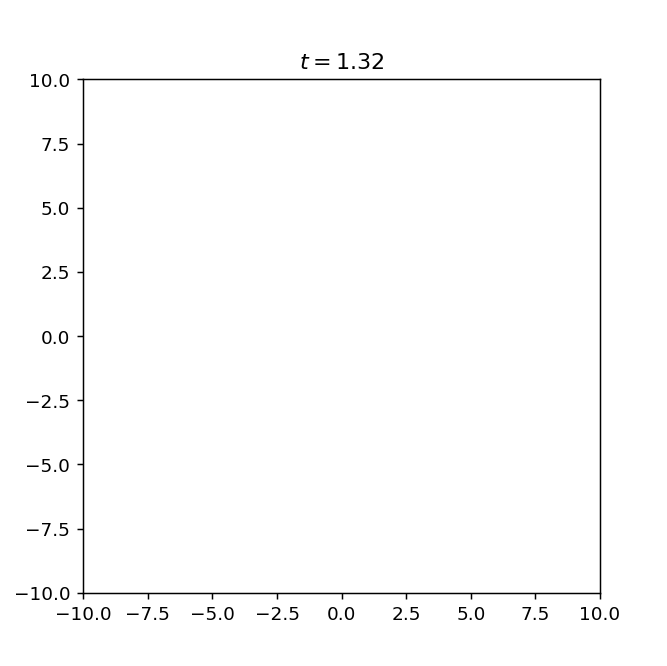

In [15]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    
def Update(i):
    ax.clear()
    init()
    
    ax.set_title(r'$ t = %.2f$' %(t[i]))
    
    x = Particles.GetPosition(scale)[i,0]
    y = Particles.GetPosition(scale)[i,1]
    
    vx = Particles.GetVelocity(scale)[i,0]
    vy = Particles.GetVelocity(scale)[i,1]
    
    circle = plt.Circle((x,y),Particles.radius, fill=True)
    ax.add_patch(circle)
    
    ax.arrow( x,y,vx,vy,head_width=0.2,color='r' )
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)    